In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
data = pd.read_csv("HotelCancelation.csv")

In [4]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
print(data.head())
print(data.shape)

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [6]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
data.isnull().values.any()

False

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [8]:
import holidays
from workalendar.europe import UnitedKingdom

In [9]:
data_new = data
cols = ["arrival_year","arrival_month","arrival_date"]
data_new = data_new.sort_values(by = cols)
data_new['date_of_arrival'] = data_new[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
data_new

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [10]:
print("Number of Rows containing invalid dates:",data_new["date_of_arrival"].str.contains("2018-2-29", na=False).sum())
data_new.drop(data_new[(data_new['date_of_arrival'] == "2018-2-29")].index, inplace=True)
data_new

Number of Rows containing invalid dates: 37


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [11]:
data_new

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [12]:
sub_data_new = data_new.loc[data_new["booking_status"].str.contains("Not_Canceled"),:]

In [13]:
sub_data_new.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'date_of_arrival'],
      dtype='object')

In [14]:
sub_data_new.drop(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time','date_of_arrival',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests','booking_status'], axis=1, inplace=True)

In [15]:
sub_data_new

,arrival_year,arrival_month
583,2017,7
2538,2017,7
5884,2017,7
8290,2017,7
8762,2017,7
...,...,...
28291,2018,12
29690,2018,12
32027,2018,12
32894,2018,12


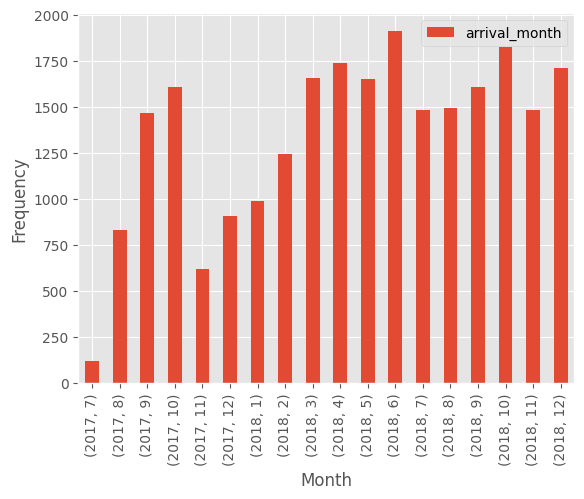

In [16]:
sub_data_new.groupby([sub_data_new.arrival_year, sub_data_new[data_new["booking_status"] == "Not_Canceled"].arrival_month]).count().plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

In [17]:

data_new["total_no_of_nights"] = data_new["no_of_weekend_nights"] + data_new["no_of_week_nights"]
data_new = data_new.drop(["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","arrival_year","arrival_month","arrival_date","Booking_ID"],axis=1)
data_new

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival,total_no_of_nights
583,Meal Plan 2,0,Room_Type 1,257,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1,2
695,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2
769,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2
1132,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2
1775,Meal Plan 1,0,Room_Type 1,65,Online,0,0,0,68.00,1,Canceled,2017-7-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,Meal Plan 1,0,Room_Type 6,260,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31,1
32894,Meal Plan 1,0,Room_Type 1,103,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31,3
33442,Meal Plan 1,0,Room_Type 1,269,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31,2
33902,Meal Plan 1,0,Room_Type 1,103,Offline,0,0,0,205.00,0,Canceled,2018-12-31,3


In [18]:
holiday_list = []
for holiday in holidays.UnitedKingdom(years=[2017, 2018]).items():
    holiday_list.append(holiday)

holidays_df = pd.DataFrame(holiday_list, columns=["date", "holiday"])
holidays_df

,date,holiday
0,2017-01-01,New Year's Day
1,2017-01-02,New Year Holiday [Scotland]; New Year's Day (O...
2,2017-01-03,New Year Holiday [Scotland] (Observed)
3,2017-03-17,St. Patrick's Day [Northern Ireland]
4,2017-07-12,Battle of the Boyne [Northern Ireland]
5,2017-08-07,Summer Bank Holiday [Scotland]
6,2017-11-30,St. Andrew's Day [Scotland]
7,2017-12-25,Christmas Day
8,2017-04-14,Good Friday
9,2017-04-17,Easter Monday [England/Wales/Northern Ireland]


In [19]:
uk_holidays = holidays.UnitedKingdom(years=[2017, 2018])
data_new["is_holiday"] = [date in uk_holidays for date in data_new["date_of_arrival"]]
# data_new = data_new.replace({"is_holiday":{"True":"holiday","False":"not_holiday"}})
data_new

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival,total_no_of_nights,is_holiday
583,Meal Plan 2,0,Room_Type 1,257,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1,2,False
695,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2,False
769,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2,False
1132,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2,False
1775,Meal Plan 1,0,Room_Type 1,65,Online,0,0,0,68.00,1,Canceled,2017-7-1,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,Meal Plan 1,0,Room_Type 6,260,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31,1,False
32894,Meal Plan 1,0,Room_Type 1,103,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31,3,False
33442,Meal Plan 1,0,Room_Type 1,269,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31,2,False
33902,Meal Plan 1,0,Room_Type 1,103,Offline,0,0,0,205.00,0,Canceled,2018-12-31,3,False


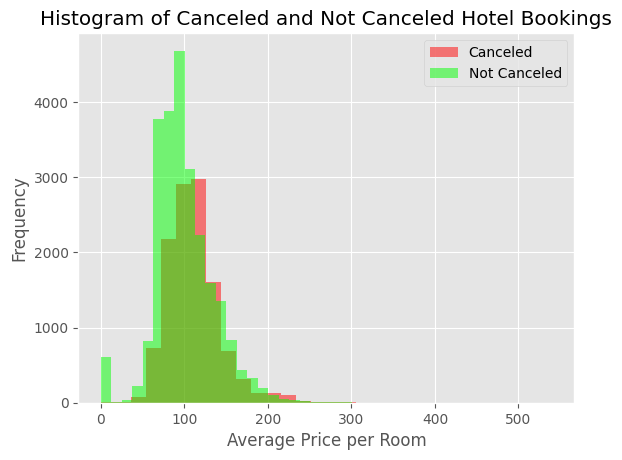

In [20]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].avg_price_per_room,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].avg_price_per_room,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Average Price per Room")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


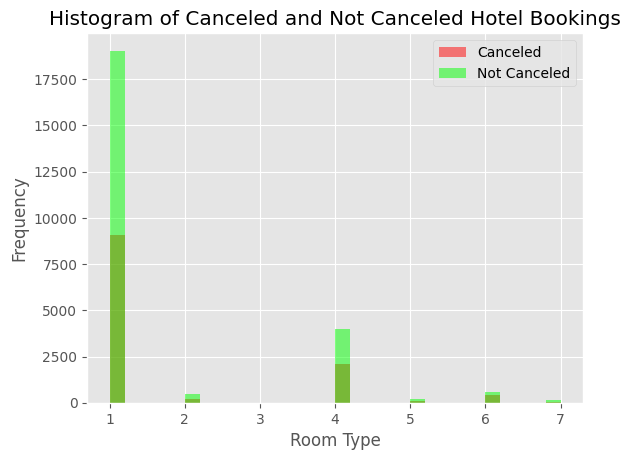

In [21]:
copy_data_new = data_new
copy_data_new = copy_data_new.sort_values(by = "room_type_reserved")
copy_data_new = copy_data_new.replace({"room_type_reserved":{"Room_Type 1":"1","Room_Type 2":"2","Room_Type 3":"3","Room_Type 4":"4","Room_Type 5":"5","Room_Type 6":"6","Room_Type 7":"7"}})
c = plt.hist(copy_data_new[copy_data_new["booking_status"] == "Canceled"].room_type_reserved,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(copy_data_new[copy_data_new["booking_status"] == "Not_Canceled"].room_type_reserved,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Room Type")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


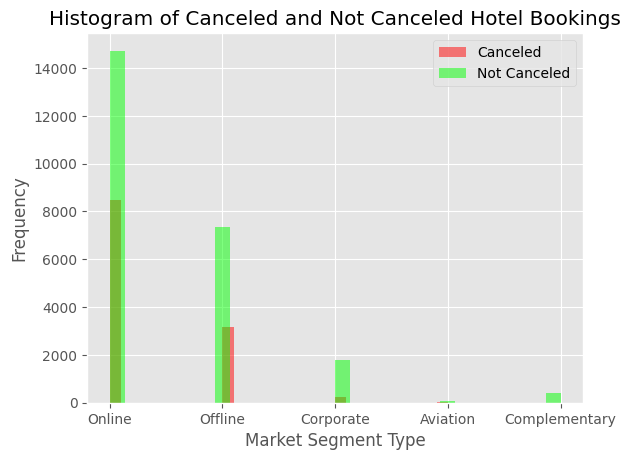

In [22]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].market_segment_type,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].market_segment_type,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Market Segment Type")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

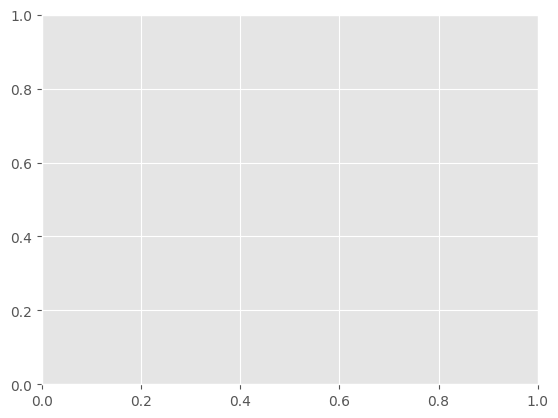

In [23]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].is_holiday,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].is_holiday,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Market Segment Type")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

In [ ]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].repeated_guest,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].repeated_guest,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

In [ ]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].no_of_previous_bookings_not_canceled,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].no_of_previous_bookings_not_canceled,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()



In [ ]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].lead_time,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].lead_time,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


In [ ]:
on = plt.hist(data_new[data_new["market_segment_type"] == "Online"].repeated_guest,bins=30,fc = (1,0,0,0.5),label = "Online")
of = plt.hist(data_new[data_new["market_segment_type"] == "Offline"].repeated_guest,bins=30,fc = (0,1,0,0.5),label = "Offline")
comp = plt.hist(data_new[data_new["market_segment_type"] == "Complementary"].repeated_guest,bins=30,fc = (0,0,1,0.5),label = "Complementary")
corp = plt.hist(data_new[data_new["market_segment_type"] == "Corporate"].repeated_guest,bins=30,fc = (1,1,0,0.5),label = "Corporate")
a = plt.hist(data_new[data_new["market_segment_type"] == "Aviation"].repeated_guest,bins=30,fc = (1,0,1,0.5),label = "Aviation")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

In [ ]:
data_canceled = data_new[data_new["booking_status"] == "Canceled"]
data_not_canceled = data_new[data_new["booking_status"] == "Not_Canceled"]
desc1 = data_canceled.avg_price_per_room.describe()
print(desc1)
Q1 = desc1[4]
Q3 = desc1[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("For Canceled Bookings, anything outside this range is an outlier: (",lower_bound,",",upper_bound,")")
data_canceled[data_canceled.avg_price_per_room < lower_bound].avg_price_per_room
print(" Canceled Booking Outliers: ",data_canceled[(data_canceled.avg_price_per_room < lower_bound)|(data_canceled.avg_price_per_room > upper_bound)].avg_price_per_room.values)

In [ ]:
desc2 = data_canceled.lead_time.describe()
print(desc2)
Q1 = desc2[4]
Q3 = desc2[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (",lower_bound,",",upper_bound,")")
data_canceled[data_canceled.lead_time < lower_bound].lead_time
print("Outliers: ",data_canceled[(data_canceled.lead_time < lower_bound)|(data_canceled.lead_time > upper_bound)].lead_time.values)

In [ ]:
melted_data = pd.melt(data_new,id_vars = "booking_status",value_vars = ['avg_price_per_room', 'lead_time'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="booking_status",data= melted_data)
plt.show()

In [ ]:
melted_data = pd.melt(data_new,id_vars = "booking_status",value_vars = ['no_of_guests'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="booking_status",data= melted_data)
plt.show()